## Import and get data


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.options.display.max_columns = 100


In [2]:
full_data = pd.read_csv("Supplychain train dataset.xlsx")
full_data.head()


Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [3]:
full_data.shape

(22150, 24)

In [4]:
full_data.size

531600

## EDA


In [5]:
full_data["Ware_house_ID"].value_counts()


WH_100000    1
WH_114763    1
WH_114771    1
WH_114770    1
WH_114769    1
            ..
WH_107382    1
WH_107381    1
WH_107380    1
WH_107379    1
WH_122149    1
Name: Ware_house_ID, Length: 22150, dtype: int64

In [6]:
full_data["WH_Manager_ID"].value_counts()


EID_50000    1
EID_64763    1
EID_64771    1
EID_64770    1
EID_64769    1
            ..
EID_57382    1
EID_57381    1
EID_57380    1
EID_57379    1
EID_72149    1
Name: WH_Manager_ID, Length: 22150, dtype: int64

Since `Ware_house_ID` amd `WH_Manager_ID` are unique id columns, it won't contribute to the model and hence we drop them.


In [7]:
full_data.drop(["Ware_house_ID", "WH_Manager_ID"], axis=1, inplace=True)

In [8]:
full_data.head()


Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                   3   
1         Rural            Large  North           Zone 5                   0   
2         Rural              Mid  South           Zone 2                   1   
3         Rural              Mid  North           Zone 3                   7   
4         Rural            Large  North           Zone 5                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    1                  2             4651         Rented   
1                    0                  4             6217  Company Owned   
2                    0                  4             4306  Company Owned   
3                    4                  2             6000         Rented   
4                    1                  2             4740  Company Owned   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0               24               0            1                1   
1               47               0            0                1   
2               64               0            0                0   
3               50               0            0                0   
4               42               1            0                1   

   dist_from_hub  workers_num  wh_est_year  storage_issue_reported_l3m  \
0             91         29.0          NaN                          13   
1            210         31.0          NaN                           4   
2            161         37.0          NaN                          17   
3            103         21.0          NaN                          17   
4            112         25.0       2009.0                          18   

   temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0              0                            A                 5   
1              0                            A                 3   
2              0                            A                 6   
3              1                           A+                 3   
4              0                            C                 6   

   govt_check_l3m  product_wg_ton  
0              15           17115  
1              17            5074  
2              22           23137  
3              27           22115  
4              24           24071

In [9]:
full_data.dtypes


Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

There are both numerical and categorical variables.


In [10]:
full_data.isna().sum()


Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

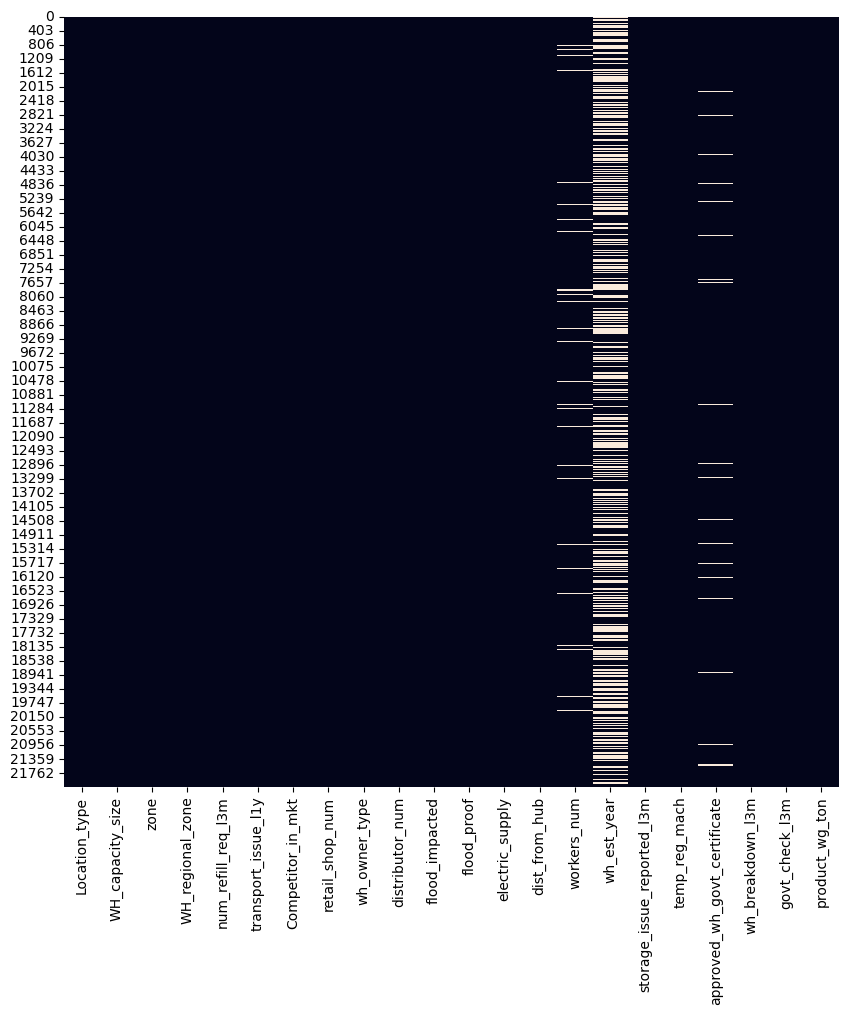

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(full_data.isna(), cbar=False)
plt.show()

There are missing values, we can handle this later on after data exploration.


In [12]:
full_data["Location_type"].value_counts()


Rural    20334
Urban     1816
Name: Location_type, dtype: int64

In [13]:
full_data["WH_capacity_size"].value_counts()


Large    8968
Mid      8902
Small    4280
Name: WH_capacity_size, dtype: int64

In [14]:
full_data["zone"].value_counts()


North    9069
West     7055
South    5644
East      382
Name: zone, dtype: int64

In [15]:
full_data["WH_regional_zone"].value_counts()


Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: WH_regional_zone, dtype: int64

In [16]:
full_data["wh_owner_type"].value_counts()


Company Owned    12035
Rented           10115
Name: wh_owner_type, dtype: int64

In [17]:
full_data["approved_wh_govt_certificate"].value_counts()


C     4859
B+    4321
B     4269
A     4158
A+    3738
Name: approved_wh_govt_certificate, dtype: int64

In [18]:
full_data.sample(5)


Location_type WH_capacity_size   zone WH_regional_zone  \
10202         Rural            Large  South           Zone 5   
19121         Rural              Mid  North           Zone 4   
16538         Rural              Mid  South           Zone 3   
15612         Rural              Mid   West           Zone 4   
7955          Rural              Mid   West           Zone 2   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
10202                   3                    1                  3   
19121                   8                    0                  3   
16538                   3                    4                  5   
15612                   6                    0                  2   
7955                    3                    2                  2   

       retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
10202             3950  Company Owned               49               0   
19121             4096  Company Owned               34               0   
16538             4266         Rented               32               0   
15612             7387  Company Owned               42               0   
7955              4599         Rented               31               0   

       flood_proof  electric_supply  dist_from_hub  workers_num  wh_est_year  \
10202            0                1            262         31.0       2002.0   
19121            0                1             96         32.0       2023.0   
16538            0                1             63         39.0       2003.0   
15612            0                1            159         27.0       2005.0   
7955             0                1             73         40.0       2015.0   

       storage_issue_reported_l3m  temp_reg_mach approved_wh_govt_certificate  \
10202                          31              1                            A   
19121                           0              0                          NaN   
16538                          26              1                            B   
15612                          29              0                            B   
7955                           13              0                           B+   

       wh_breakdown_l3m  govt_check_l3m  product_wg_ton  
10202                 6              14           41080  
19121                 0              26            8072  
16538                 2              27           31097  
15612                 6              26           34135  
7955                  1               1           15121

In [19]:
categorical_variables = list(full_data.select_dtypes(include="O").columns)
categorical_variables


['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

- `Location_type`, `zone`, `WH_regional_zone` and `wh_owner_type` are nominal variables and hence should be treated with one hot encoding.
- `approved_wh_govt_certificate` and `WH_capacity_size` are ordinal variables and hence we should use ordinal encoding.


In [20]:
numerical_variables = list(full_data.select_dtypes(exclude="O").columns)
numerical_variables


['num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'dist_from_hub',
 'workers_num',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'product_wg_ton']

In [21]:
len(numerical_variables)


16

In [22]:
full_data.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        22150.000000         22150.000000       22150.000000   
mean             4.097020             0.777201           3.103928   
std              2.606289             1.201747           1.142886   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     22150.000000     22150.000000    22150.000000  22150.000000   
mean       4983.115711        42.386998        0.098691      0.054492   
std        1050.634225        16.057730        0.298253      0.226991   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4309.250000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5499.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     22150.000000   22150.000000  21273.000000  11605.000000   
mean          0.656072     163.613725     28.936398   2009.401206   
std           0.475028      62.660709      7.843431      7.527223   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                22150.000000   22150.000000      22150.000000   
mean                    17.116659       0.304199          3.487765   
std                      9.174193       0.460078          1.691661   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    22150.000000    22150.000000  
mean        18.767765    22086.780813  
std          8.644778    11626.192340  
min          1.000000     2065.000000  
25%         11.000000    12151.000000  
50%         20.000000    22099.000000  
75%         26.000000    30102.000000  
max         32.000000    55151.000000

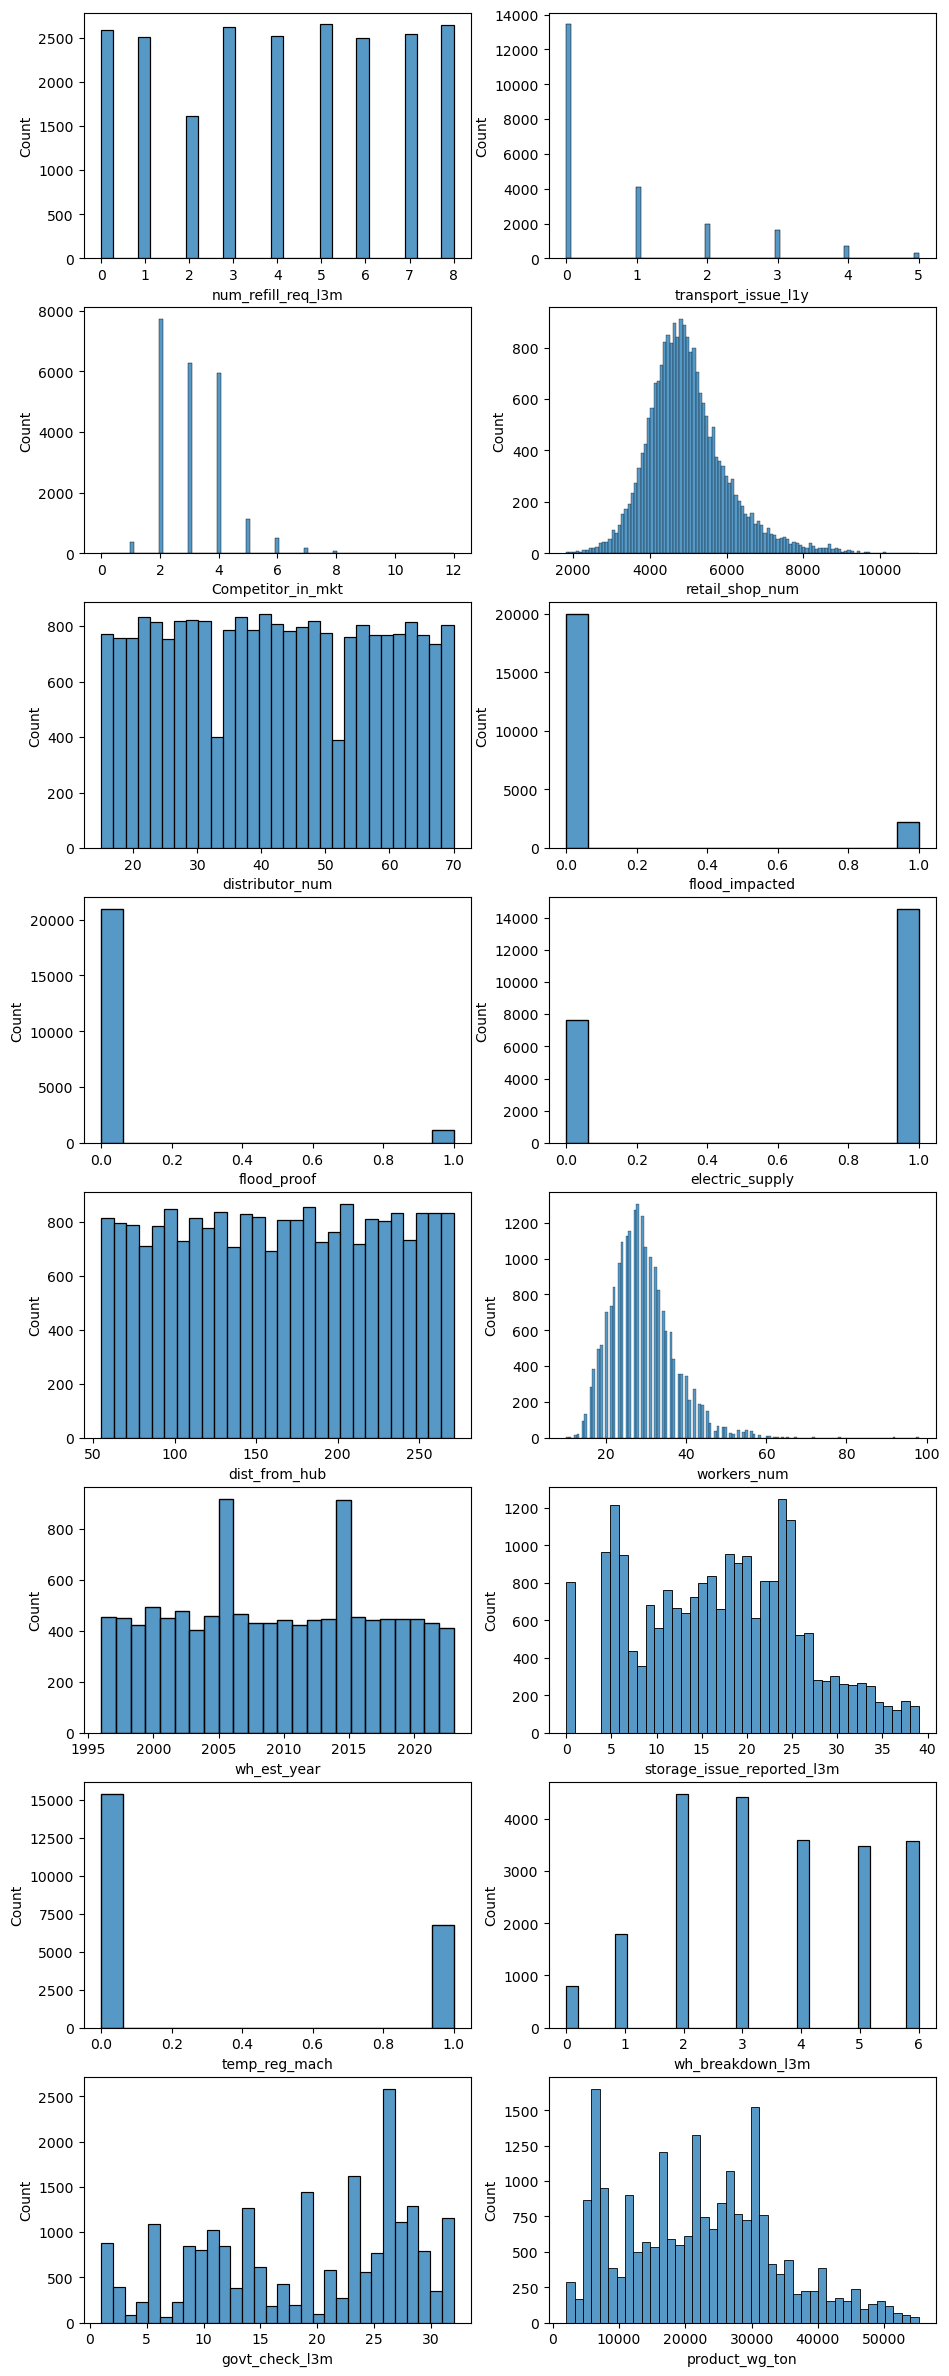

In [23]:
plt.figure(figsize=(11, 30))
for i in range(16):
    plt.subplot(8, 2, i + 1)
    sns.histplot(data=full_data, x=numerical_variables[i])
plt.show()

from above graphs its also evident that `flood_impacted`, `flood_proof`, `electric_supply` and `temp_reg_mach` are also binary categorical variables that are to be treated using one hot encoding.


In [24]:
numerical_variables.remove("flood_impacted")
numerical_variables.remove("flood_proof")
numerical_variables.remove("electric_supply")
numerical_variables.remove("temp_reg_mach")

categorical_variables.extend(
    ["flood_impacted", "flood_proof", "electric_supply", "temp_reg_mach"]
)


In [25]:
len(numerical_variables)

12

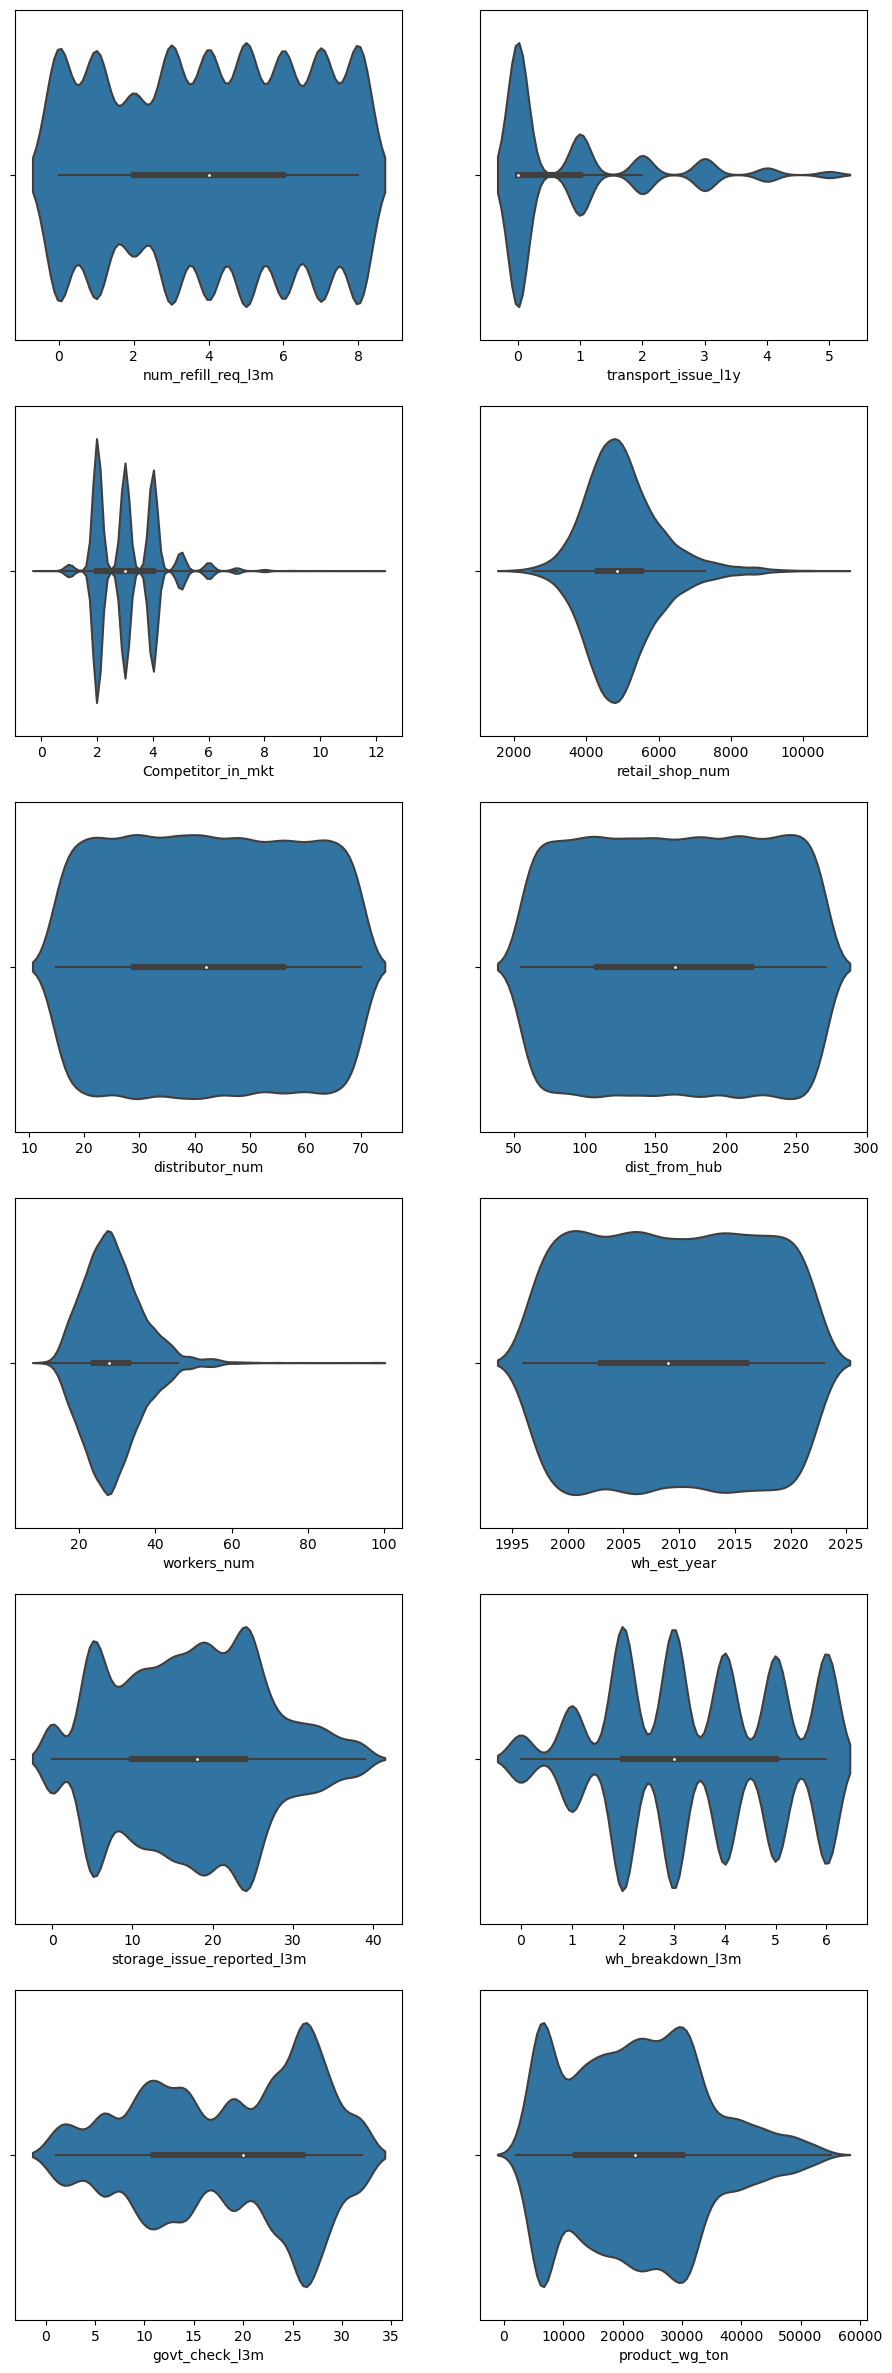

In [26]:
plt.figure(figsize=(11, 30))
for i in range(12):
    plt.subplot(6, 2, i + 1)
    sns.violinplot(data=full_data, x=numerical_variables[i])
plt.show()

In [27]:
categorical_variables

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'temp_reg_mach']

In [28]:
len(numerical_variables)


12

In [29]:
full_data[numerical_variables].corr()


num_refill_req_l3m  transport_issue_l1y  \
num_refill_req_l3m                    1.000000             0.020336   
transport_issue_l1y                   0.020336             1.000000   
Competitor_in_mkt                     0.008104            -0.008288   
retail_shop_num                      -0.001776             0.001391   
distributor_num                       0.005063             0.005509   
dist_from_hub                        -0.000611             0.013864   
workers_num                          -0.013751            -0.009625   
wh_est_year                           0.012628            -0.013837   
storage_issue_reported_l3m           -0.007719            -0.145914   
wh_breakdown_l3m                      0.000704             0.011795   
govt_check_l3m                       -0.006470             0.006058   
product_wg_ton                        0.000676            -0.175746   

                            Competitor_in_mkt  retail_shop_num  \
num_refill_req_l3m                   0.008104        -0.001776   
transport_issue_l1y                 -0.008288         0.001391   
Competitor_in_mkt                    1.000000        -0.154848   
retail_shop_num                     -0.154848         1.000000   
distributor_num                      0.000886        -0.004396   
dist_from_hub                        0.010358         0.001983   
workers_num                         -0.004387        -0.007281   
wh_est_year                         -0.012101         0.007627   
storage_issue_reported_l3m           0.007654        -0.007045   
wh_breakdown_l3m                     0.012544        -0.005694   
govt_check_l3m                      -0.043094         0.043557   
product_wg_ton                       0.007282        -0.006785   

                            distributor_num  dist_from_hub  workers_num  \
num_refill_req_l3m                 0.005063      -0.000611    -0.013751   
transport_issue_l1y                0.005509       0.013864    -0.009625   
Competitor_in_mkt                  0.000886       0.010358    -0.004387   
retail_shop_num                   -0.004396       0.001983    -0.007281   
distributor_num                    1.000000      -0.007538    -0.014371   
dist_from_hub                     -0.007538       1.000000    -0.015183   
workers_num                       -0.014371      -0.015183     1.000000   
wh_est_year                       -0.015375       0.009228     0.006868   
storage_issue_reported_l3m         0.003314      -0.006531    -0.008788   
wh_breakdown_l3m                   0.001885       0.001300    -0.020225   
govt_check_l3m                    -0.005996       0.002769    -0.004913   
product_wg_ton                     0.005143      -0.006040    -0.007800   

                            wh_est_year  storage_issue_reported_l3m  \
num_refill_req_l3m             0.012628                   -0.007719   
transport_issue_l1y           -0.013837                   -0.145914   
Competitor_in_mkt             -0.012101                    0.007654   
retail_shop_num                0.007627                   -0.007045   
distributor_num               -0.015375                    0.003314   
dist_from_hub                  0.009228                   -0.006531   
workers_num                    0.006868                   -0.008788   
wh_est_year                    1.000000                   -0.858409   
storage_issue_reported_l3m    -0.858409                    1.000000   
wh_breakdown_l3m              -0.398383                    0.377509   
govt_check_l3m                 0.008364                   -0.010313   
product_wg_ton                -0.828743                    0.986796   

                            wh_breakdown_l3m  govt_check_l3m  product_wg_ton  
num_refill_req_l3m                  0.000704       -0.006470        0.000676  
transport_issue_l1y                 0.011795        0.006058       -0.175746  
Competitor_in_mkt                   0.012544       -0.043094        0.007282  
retail_shop_num              

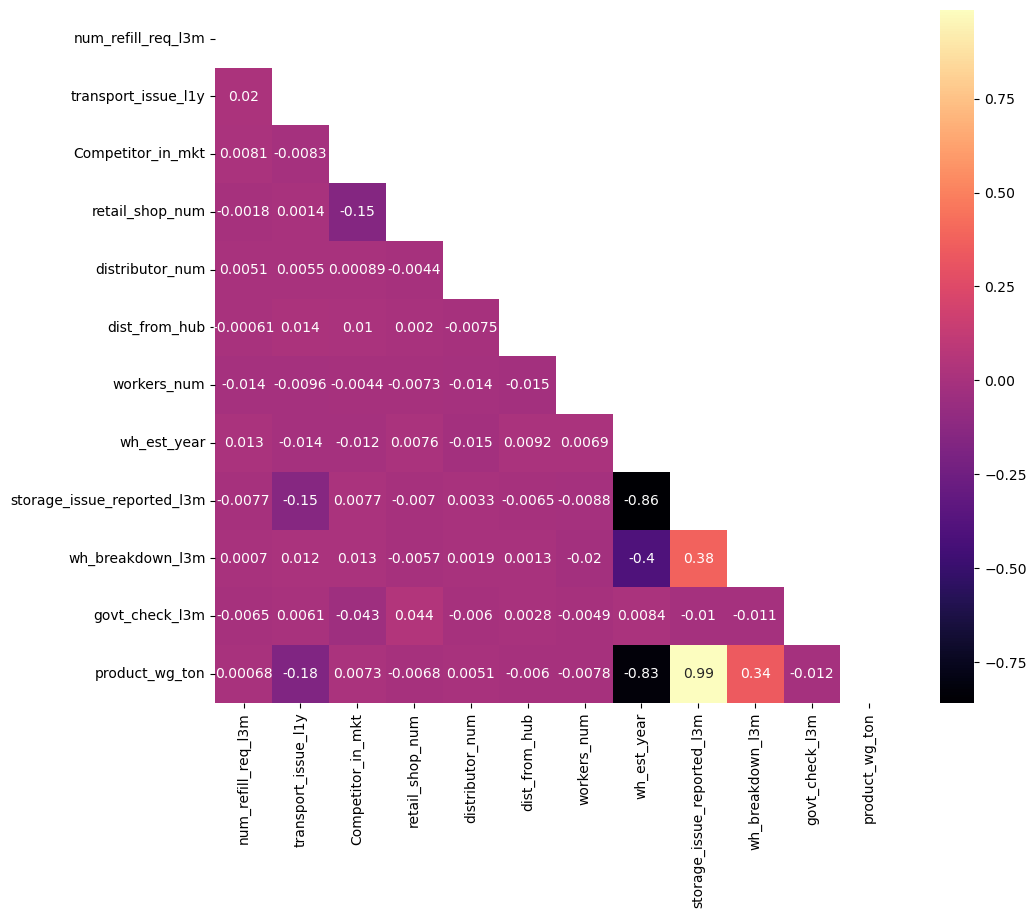

In [30]:
plt.figure(figsize=(11, 9))
mask = np.tril(np.ones_like(full_data[numerical_variables].corr())).T
sns.heatmap(
    data=full_data[numerical_variables].corr("pearson"),
    annot=True,
    cmap="magma",
    mask=mask,
)
plt.show()

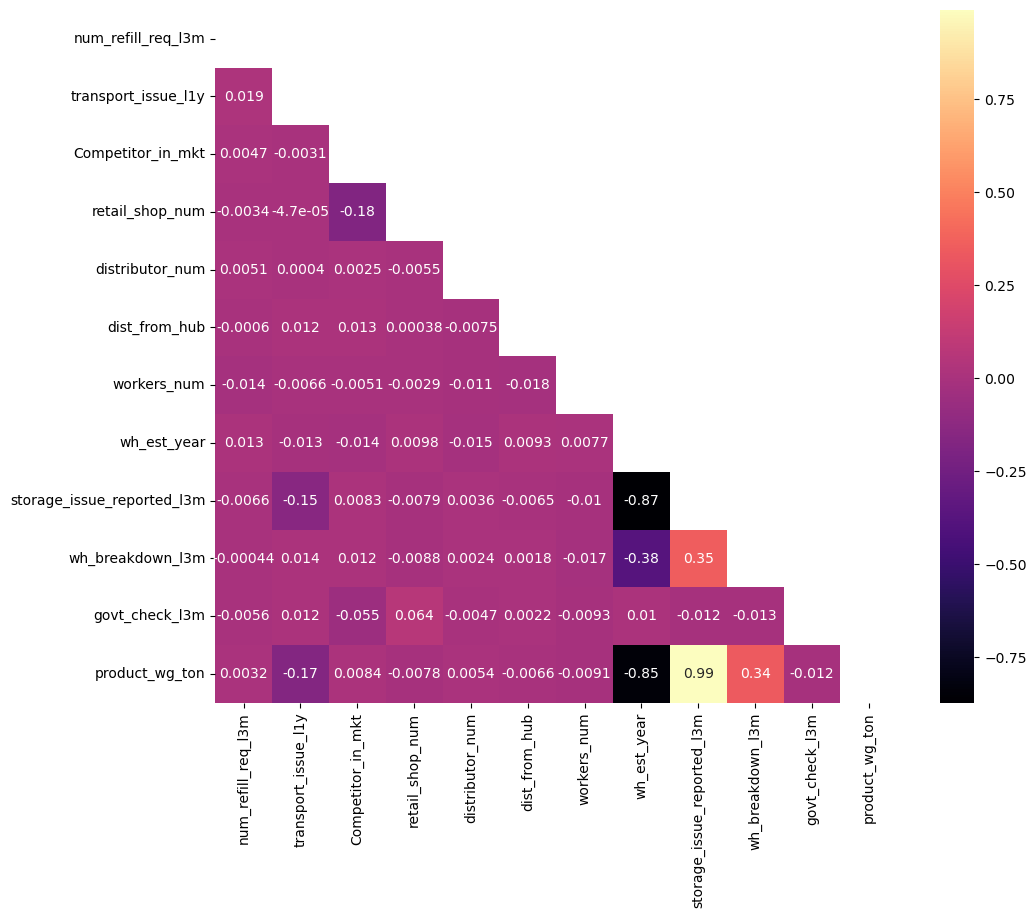

In [31]:
plt.figure(figsize=(11, 9))
mask = np.tril(np.ones_like(full_data[numerical_variables].corr())).T
sns.heatmap(
    data=full_data[numerical_variables].corr("spearman"),
    annot=True,
    cmap="magma",
    mask=mask,
)
plt.show()

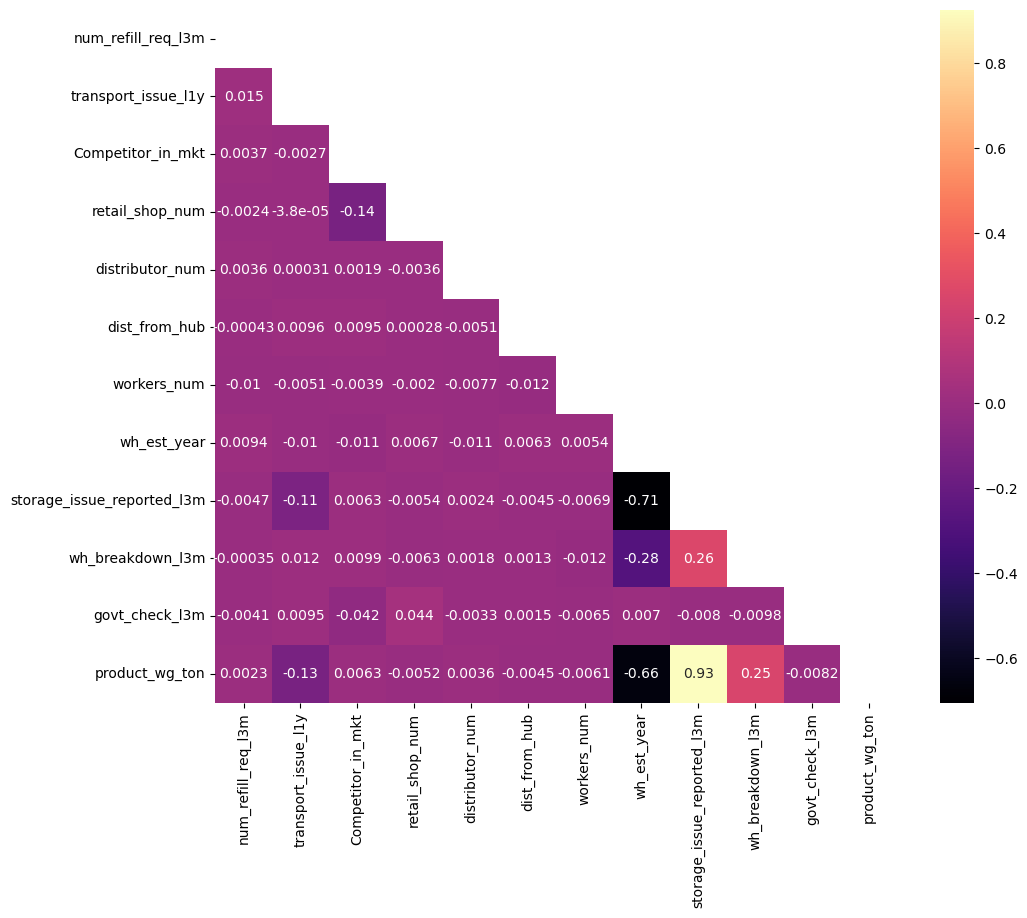

In [32]:
plt.figure(figsize=(11, 9))
mask = np.tril(np.ones_like(full_data[numerical_variables].corr())).T
sns.heatmap(
    data=full_data[numerical_variables].corr("kendall"),
    annot=True,
    cmap="magma",
    mask=mask,
)
plt.show()

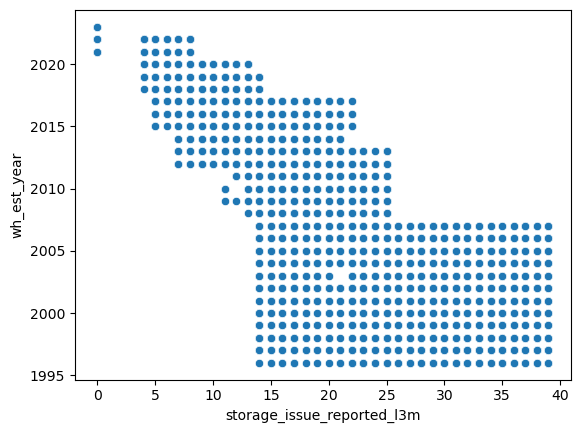

In [33]:
sns.scatterplot(x=full_data["storage_issue_reported_l3m"], y=full_data["wh_est_year"])
plt.show()

In [34]:
# sns.pairplot(full_data)
# plt.show()


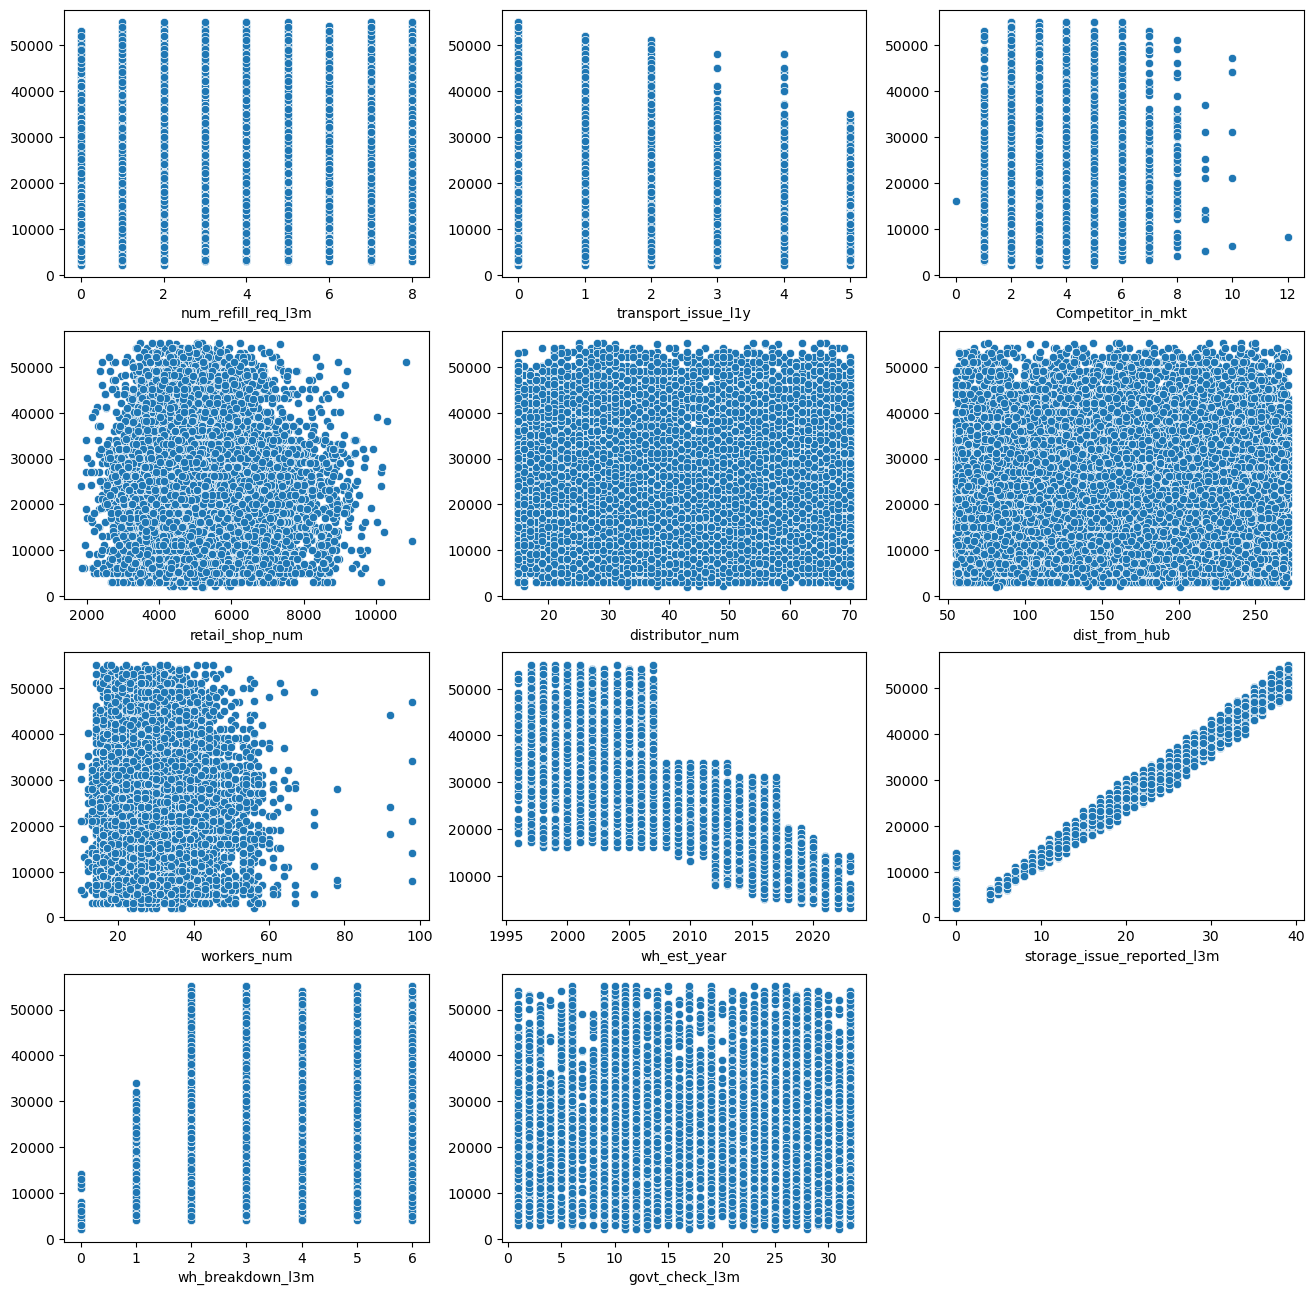

In [35]:
# Comparing all numerical variables to the target variable

plt.figure(figsize=(16, 16))
for i in range(11):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(data=full_data, x=numerical_variables[i], y="product_wg_ton")
    plt.ylabel("")
plt.show()

In [36]:
cat_cols = pd.get_dummies(full_data[categorical_variables], drop_first=True)
cat_cols.head()


flood_impacted  flood_proof  electric_supply  temp_reg_mach  \
0               0            1                1              0   
1               0            0                1              0   
2               0            0                0              0   
3               0            0                0              1   
4               1            0                1              0   

   Location_type_Urban  WH_capacity_size_Mid  WH_capacity_size_Small  \
0                    1                     0                       1   
1                    0                     0                       0   
2                    0                     1                       0   
3                    0                     1                       0   
4                    0                     0                       0   

   zone_North  zone_South  zone_West  WH_regional_zone_Zone 2  \
0           0           0          1                        0   
1           1           0          0                        0   
2           0           1          0                        1   
3           1           0          0                        0   
4           1           0          0                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        0                        1   

   WH_regional_zone_Zone 6  wh_owner_type_Rented  \
0                        1                     1   
1                        0                     0   
2                        0                     0   
3                        0                     1   
4                        0                     0   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                1                               0   
4                                0                               0   

   approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  
0                                0                               0  
1                                0                               0  
2                                0                               0  
3                                0                               0  
4                                0                               1

In [37]:
categorical_variables

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'temp_reg_mach']

In [38]:
len(cat_cols.columns)


20

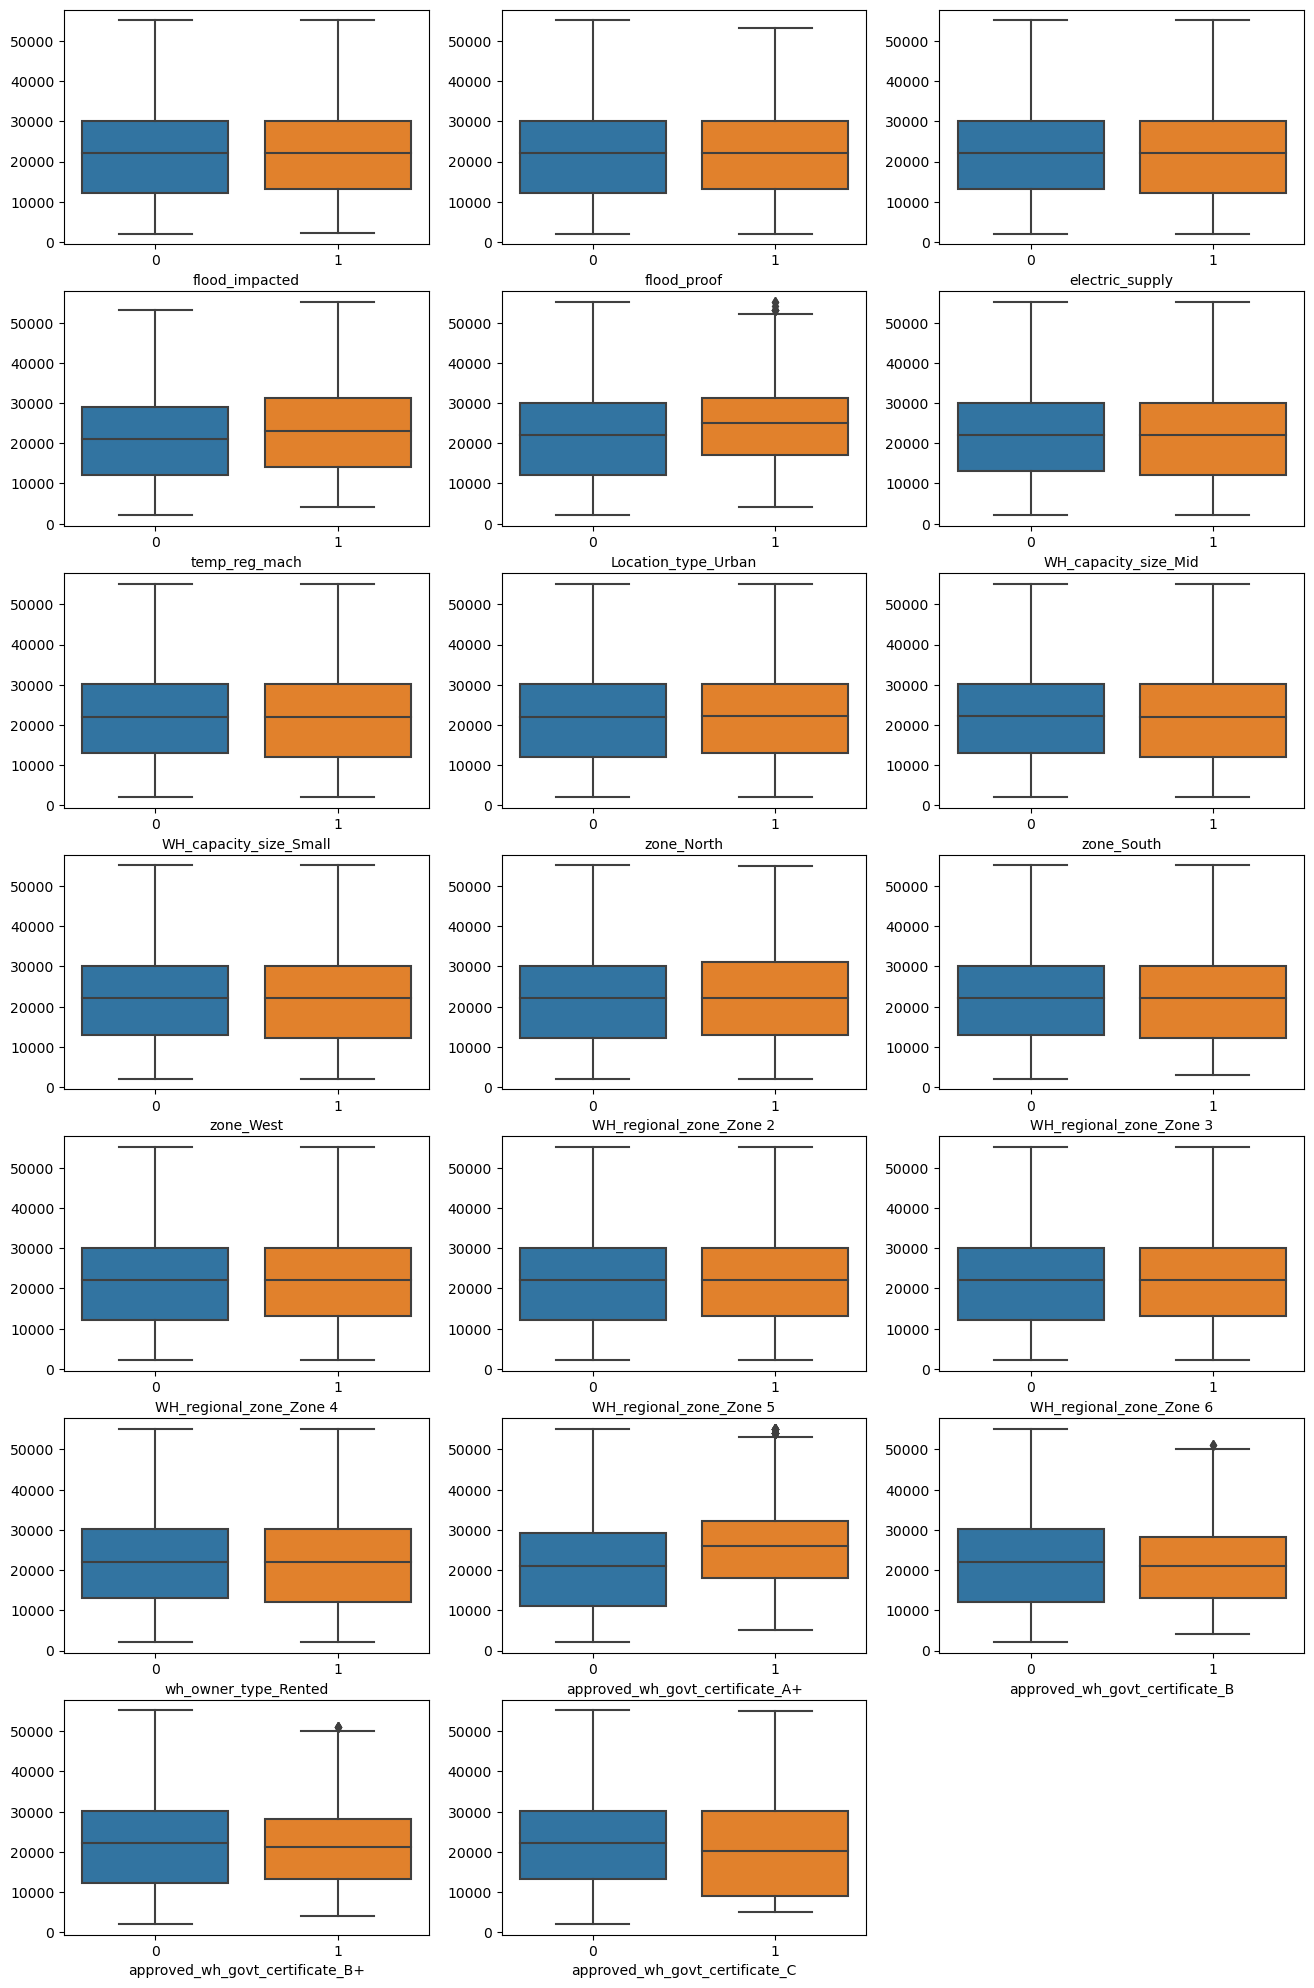

In [39]:
# Comparing all numerical variables to the target variable

plt.figure(figsize=(16, 25))
for i in range(20):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(x=cat_cols.iloc[:, i], y=full_data["product_wg_ton"])
    plt.ylabel("")
plt.show()

- From above plots it is evident that `storage_issue_reported_l3m` has the most correlation with the target variable `product_wg_ton`. A linear relationship exist between them. More the issues reported, more the product weight in ton dispatched.
- Most negatively correlated variable is `wh_est_year`. But since it is in year format, it is actually positively correlated age wise.
- Both the above independent variables are also highly correlated with each other.


## Data Preprocessing


#### Splitting full_data in training, validation and testing data


For estimating the values of hyperparameters using holdout cross validation technique


In [40]:
X = full_data.drop("product_wg_ton", axis=1)
y = full_data["product_wg_ton"]
X.head()

Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                   3   
1         Rural            Large  North           Zone 5                   0   
2         Rural              Mid  South           Zone 2                   1   
3         Rural              Mid  North           Zone 3                   7   
4         Rural            Large  North           Zone 5                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    1                  2             4651         Rented   
1                    0                  4             6217  Company Owned   
2                    0                  4             4306  Company Owned   
3                    4                  2             6000         Rented   
4                    1                  2             4740  Company Owned   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0               24               0            1                1   
1               47               0            0                1   
2               64               0            0                0   
3               50               0            0                0   
4               42               1            0                1   

   dist_from_hub  workers_num  wh_est_year  storage_issue_reported_l3m  \
0             91         29.0          NaN                          13   
1            210         31.0          NaN                           4   
2            161         37.0          NaN                          17   
3            103         21.0          NaN                          17   
4            112         25.0       2009.0                          18   

   temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0              0                            A                 5   
1              0                            A                 3   
2              0                            A                 6   
3              1                           A+                 3   
4              0                            C                 6   

   govt_check_l3m  
0              15  
1              17  
2              22  
3              27  
4              24

In [41]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, train_size=0.9, random_state=39, shuffle=True
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, train_size=0.9, random_state=39, shuffle=True
)

print("Shape of ")
print("X:", X.shape)
print("y:", y.shape)
print("X_train_full:", X_train_full.shape)
print("y_train_full:", y_train_full.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("y_valid:", y_valid.shape)

Shape of 
X: (22150, 21)
y: (22150,)
X_train_full: (19935, 21)
y_train_full: (19935,)
X_test: (2215, 21)
y_test: (2215,)
X_train: (17941, 21)
y_train: (17941,)
X_valid: (1994, 21)
y_valid: (1994,)


In [42]:
X_train.head()


Location_type WH_capacity_size   zone WH_regional_zone  \
1550          Rural              Mid   West           Zone 4   
6103          Urban            Large  North           Zone 5   
1657          Rural              Mid   West           Zone 4   
21149         Urban              Mid  North           Zone 3   
17007         Rural            Small   West           Zone 6   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
1550                    3                    1                  3   
6103                    6                    4                  3   
1657                    1                    0                  6   
21149                   7                    0                  2   
17007                   5                    0                  4   

       retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
1550              4759  Company Owned               66               0   
6103              5133  Company Owned               65               0   
1657              6622  Company Owned               45               0   
21149             5908         Rented               28               0   
17007             4044         Rented               61               0   

       flood_proof  electric_supply  dist_from_hub  workers_num  wh_est_year  \
1550             0                1            253         26.0       2020.0   
6103             0                1            115         23.0       2013.0   
1657             0                1            210         36.0          NaN   
21149            0                1            232         21.0       2020.0   
17007            0                1            185         32.0       2001.0   

       storage_issue_reported_l3m  temp_reg_mach approved_wh_govt_certificate  \
1550                            5              0                            C   
6103                           13              0                            B   
1657                            7              0                            C   
21149                           7              0                            B   
17007                          37              1                            A   

       wh_breakdown_l3m  govt_check_l3m  
1550                  3              11  
6103                  2              14  
1657                  2              26  
21149                 1              27  
17007                 4               9

#### Handling missing data


In [43]:
X_train.isna().sum()


Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      718
wh_est_year                     8569
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     656
wh_breakdown_l3m                   0
govt_check_l3m                     0
dtype: int64

- We can fill the null values of `workers_num` and `wh_est_year` with median since taking mean of count of workers and year doesn't make any sense and these are also mumerical variables.
- We can fill the null values of `approved_wh_govt_certificate` using most frequent or constant values.
- Since `wh_est_year` has a large no of null values, the null value itself could indicate something. So we can add indicator.


In [44]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy="median")
X_train["workers_num"] = imputer1.fit_transform(
    X_train["workers_num"].values.reshape(-1, 1)
)
X_valid["workers_num"] = imputer1.transform(
    X_valid["workers_num"].values.reshape(-1, 1)
)


In [45]:
imputer2 = SimpleImputer(strategy="median", add_indicator=True)
X_train[["wh_est_year", "wh_est_year_nan_ind"]] = imputer2.fit_transform(
    X_train["wh_est_year"].values.reshape(-1, 1)
)
X_valid[["wh_est_year", "wh_est_year_nan_ind"]] = imputer2.transform(
    X_valid["wh_est_year"].values.reshape(-1, 1)
)


In [46]:
imputer3 = SimpleImputer(strategy="most_frequent")
X_train["approved_wh_govt_certificate"] = imputer3.fit_transform(
    X_train["approved_wh_govt_certificate"].values.reshape(-1, 1)
)
X_valid["approved_wh_govt_certificate"] = imputer3.transform(
    X_valid["approved_wh_govt_certificate"].values.reshape(-1, 1)
)

In [47]:
X_train.isna().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
wh_est_year_nan_ind             0
dtype: int64

#### Outlier detection


In [48]:
X_train.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        17941.000000         17941.000000       17941.000000   
mean             4.089571             0.776601           3.098099   
std              2.608547             1.199884           1.146740   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     17941.000000     17941.000000    17941.000000  17941.000000   
mean       4986.932668        42.313695        0.097765      0.054958   
std        1053.955364        16.061977        0.297005      0.227904   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4860.000000        42.000000        0.000000      0.000000   
75%        5503.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     17941.000000   17941.000000  17941.000000  17941.000000   
mean          0.653977     163.430522     28.872750   2009.249763   
std           0.475714      62.682794      7.683353      5.440946   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2009.000000   
50%           1.000000     163.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2010.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                17941.000000   17941.000000       17941.00000   
mean                    17.060587       0.301878           3.48431   
std                      9.134939       0.459086           1.69182   
min                      0.000000       0.000000           0.00000   
25%                     10.000000       0.000000           2.00000   
50%                     17.000000       0.000000           3.00000   
75%                     24.000000       1.000000           5.00000   
max                     39.000000       1.000000           6.00000   

       govt_check_l3m  wh_est_year_nan_ind  
count    17941.000000         17941.000000  
mean        18.736860             0.477621  
std          8.660186             0.499513  
min          1.000000             0.000000  
25%         11.000000             0.000000  
50%         20.000000             0.000000  
75%         26.000000             1.000000  
max         32.000000             1.000000

In [49]:
Q1 = X_train_full[numerical_variables[:-1]].quantile(0.25)
Q3 = X_train_full[numerical_variables[:-1]].quantile(0.75)
IQR = Q3 - Q1
lower_limit = np.max(
    [
        (Q3 - 1.5 * IQR).to_numpy(),
        X_train_full[numerical_variables[:-1]].min().to_numpy(),
    ],
    axis=0,
)
upper_limit = np.min(
    [
        (Q3 + 1.5 * IQR).to_numpy(),
        X_train_full[numerical_variables[:-1]].max().to_numpy(),
    ],
    axis=0,
)


In [50]:
# Variables with values lower than lower limit

(lower_limit > X_train_full[numerical_variables[:-1]]).any()

num_refill_req_l3m            False
transport_issue_l1y           False
Competitor_in_mkt              True
retail_shop_num                True
distributor_num                True
dist_from_hub                 False
workers_num                    True
wh_est_year                    True
storage_issue_reported_l3m     True
wh_breakdown_l3m               True
govt_check_l3m                 True
dtype: bool

In [51]:
# Variables with values higher than upper limit

(upper_limit < X_train_full[numerical_variables[:-1]]).any()

num_refill_req_l3m            False
transport_issue_l1y            True
Competitor_in_mkt              True
retail_shop_num                True
distributor_num               False
dist_from_hub                 False
workers_num                    True
wh_est_year                   False
storage_issue_reported_l3m    False
wh_breakdown_l3m              False
govt_check_l3m                False
dtype: bool

Using inter quartile range we can find the outliers. Here all the numerical variables showing True have outliers.


#### Encoding the categorical variables


In [52]:
# Ohe hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder1 = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
X_train_ohe = pd.DataFrame(
    encoder1.fit_transform(
        X_train[
            [
                "Location_type",
                "WH_capacity_size",
                "zone",
                "WH_regional_zone",
                "wh_owner_type",
                "temp_reg_mach",
            ]
        ]
    ),
    index=X_train.index,
    columns=encoder1.get_feature_names_out(),
)
X_valid_ohe = pd.DataFrame(
    encoder1.transform(
        X_valid[
            [
                "Location_type",
                "WH_capacity_size",
                "zone",
                "WH_regional_zone",
                "wh_owner_type",
                "temp_reg_mach",
            ]
        ]
    ),
    index=X_valid.index,
    columns=encoder1.get_feature_names_out(),
)

In [53]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

order = [["A+", "A", "B+", "B", "C"]]
encoder2 = OrdinalEncoder(categories=order)
X_train["approved_wh_govt_certificate"] = encoder2.fit_transform(
    X_train["approved_wh_govt_certificate"].values.reshape(-1, 1)
)
X_valid["approved_wh_govt_certificate"] = encoder2.transform(
    X_valid["approved_wh_govt_certificate"].values.reshape(-1, 1)
)


In [54]:
# Feature engineering

X_train["years_since_establishment"] = (
    X_train["wh_est_year"].max() - X_train["wh_est_year"]
)
X_valid["years_since_establishment"] = (
    X_valid["wh_est_year"].max() - X_valid["wh_est_year"]
)

In [55]:
len(X_train.columns)


23

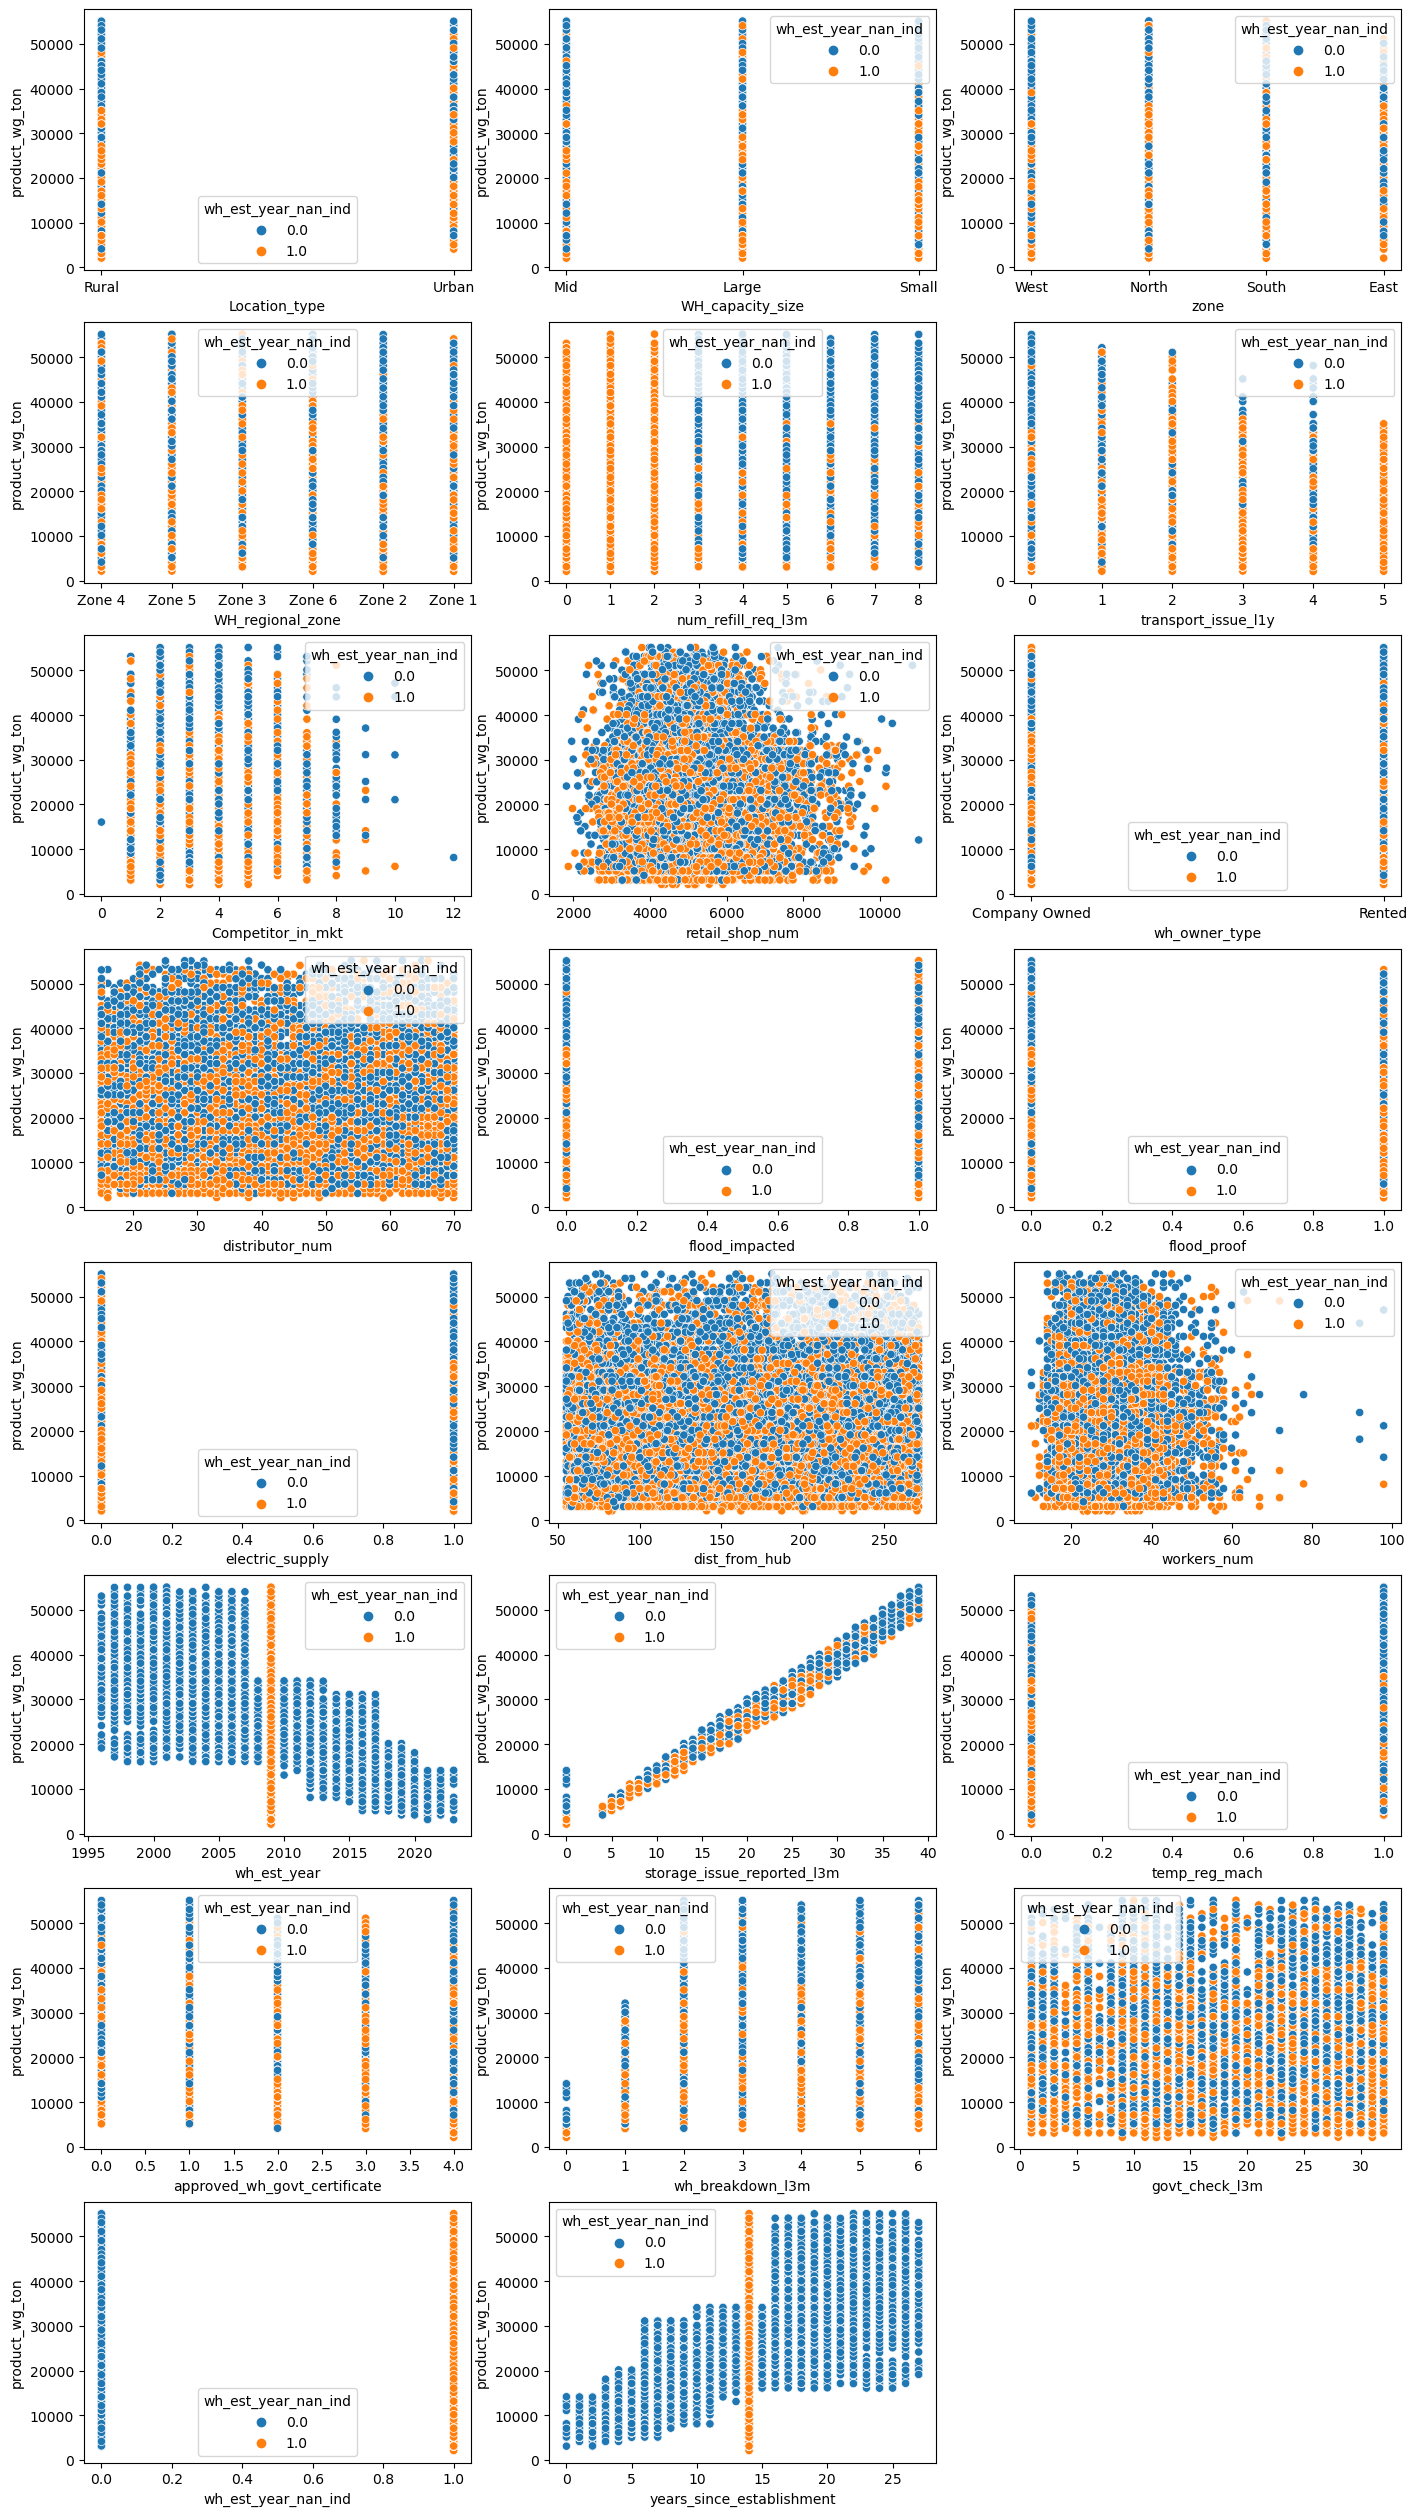

In [59]:
plt.figure(figsize=(17, 40))
for i in range(len(X_train.columns)):
    plt.subplot(10, 3, i + 1)
    sns.scatterplot(
        x=X_train.iloc[:, i],
        y=y_train,
        data=X_train,
        hue="wh_est_year_nan_ind",
    )
plt.show()

Most of the lesser smaller of refilling request received by the warehouse in last 3 month have missing values for warehouse establishment year.


In [55]:
X_train.drop(
    [
        "Location_type",
        "WH_capacity_size",
        "zone",
        "WH_regional_zone",
        "wh_owner_type",
        "temp_reg_mach",
        "wh_est_year",
    ],
    axis=1,
    inplace=True,
)
X_valid.drop(
    [
        "Location_type",
        "WH_capacity_size",
        "zone",
        "WH_regional_zone",
        "wh_owner_type",
        "temp_reg_mach",
        "wh_est_year",
    ],
    axis=1,
    inplace=True,
)

In [56]:
X_train = X_train.join(X_train_ohe)
X_valid = X_valid.join(X_valid_ohe)


In [57]:
X_train.head()


num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
1550                    3                    1                  3   
6103                    6                    4                  3   
1657                    1                    0                  6   
21149                   7                    0                  2   
17007                   5                    0                  4   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
1550              4759               66               0            0   
6103              5133               65               0            0   
1657              6622               45               0            0   
21149             5908               28               0            0   
17007             4044               61               0            0   

       electric_supply  dist_from_hub  workers_num  \
1550                 1            253         26.0   
6103                 1            115         23.0   
1657                 1            210         36.0   
21149                1            232         21.0   
17007                1            185         32.0   

       storage_issue_reported_l3m  approved_wh_govt_certificate  \
1550                            5                           4.0   
6103                           13                           3.0   
1657                            7                           4.0   
21149                           7                           3.0   
17007                          37                           1.0   

       wh_breakdown_l3m  govt_check_l3m  wh_est_year_nan_ind  \
1550                  3              11                  0.0   
6103                  2              14                  0.0   
1657                  2              26                  1.0   
21149                 1              27                  0.0   
17007                 4               9                  0.0   

       years_since_establishment  Location_type_Urban  WH_capacity_size_Mid  \
1550                         3.0                  0.0                   1.0   
6103                        10.0                  1.0                   0.0   
1657                        14.0                  0.0                   1.0   
21149                        3.0                  1.0                   1.0   
17007                       22.0                  0.0                   0.0   

       WH_capacity_size_Small  zone_North  zone_South  zone_West  \
1550                      0.0         0.0         0.0        1.0   
6103                      0.0         1.0         0.0        0.0   
1657                      0.0         0.0         0.0        1.0   
21149                     0.0         1.0         0.0        0.0   
17007                     1.0         0.0         0.0        1.0   

       WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
1550                       0.0                      0.0   
6103                       0.0                      0.0   
1657                       0.0                      0.0   
21149                      0.0                      1.0   
17007                      0.0                      0.0   

       WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
1550                       1.0                      0.0   
6103                       0.0                      1.0   
1657                       1.0                      0.0   
21149                      0.0                      0.0   
17007                      0.0                      0.0   

       WH_regional_zone_Zone 6  wh_owner_type_Rented  temp_reg_mach_1  
1550                       0.0                   0.0              0.0  
6103                       0.0                   0.0              0.0  
1657                       0.0                   0.0              0.0  
21149                      0.0                   1.0              0.0  
17007                      1.0                   1.0              1.0

In [58]:
len(X_train.columns)


29

# Scaling and Modelling


Since tree based models don't require scaling, im gonna use that before scaling.


In [59]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

predictions1 = model1.predict(X_valid)


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = predictions1
print("Mean absolute error: ", mean_absolute_error(y_valid, pred))
print("Mean squared error: ", mean_squared_error(y_valid, pred))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_valid, pred)))
print("R2 Score: ", r2_score(y_valid, pred))


Mean absolute error:  798.1509528585757
Mean squared error:  1481536.7006018055
Root Mean squared error:  1217.1839222573578
R2 Score:  0.9895436068649354


In [61]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

predictions2 = model2.predict(X_valid)


In [62]:
pred = predictions2
print("Mean absolute error: ", mean_absolute_error(y_valid, pred))
print("Mean squared error: ", mean_squared_error(y_valid, pred))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_valid, pred)))
print("R2 Score: ", r2_score(y_valid, pred))


Mean absolute error:  659.5553761283851
Mean squared error:  790296.2534904712
Root Mean squared error:  888.9860817192084
R2 Score:  0.9944222452833545


In [63]:
# Scaling the data for other models

from sklearn.preprocessing import RobustScaler

X_train_scaled = X_train.copy(deep=True)
X_valid_scaled = X_valid.copy(deep=True)
X_test_scaled = X_test.copy(deep=True)

# Since there are outliers in the data, it is more safe to use robust scaler

scaler = RobustScaler()
X_train_scaled[
    [
        "num_refill_req_l3m",
        "transport_issue_l1y",
        "Competitor_in_mkt",
        "retail_shop_num",
        "distributor_num",
        "dist_from_hub",
        "workers_num",
        "storage_issue_reported_l3m",
        "wh_breakdown_l3m",
        "govt_check_l3m",
    ]
] = scaler.fit_transform(
    X_train_scaled[
        [
            "num_refill_req_l3m",
            "transport_issue_l1y",
            "Competitor_in_mkt",
            "retail_shop_num",
            "distributor_num",
            "dist_from_hub",
            "workers_num",
            "storage_issue_reported_l3m",
            "wh_breakdown_l3m",
            "govt_check_l3m",
        ]
    ]
)
X_valid_scaled[
    [
        "num_refill_req_l3m",
        "transport_issue_l1y",
        "Competitor_in_mkt",
        "retail_shop_num",
        "distributor_num",
        "dist_from_hub",
        "workers_num",
        "storage_issue_reported_l3m",
        "wh_breakdown_l3m",
        "govt_check_l3m",
    ]
] = scaler.transform(
    X_valid_scaled[
        [
            "num_refill_req_l3m",
            "transport_issue_l1y",
            "Competitor_in_mkt",
            "retail_shop_num",
            "distributor_num",
            "dist_from_hub",
            "workers_num",
            "storage_issue_reported_l3m",
            "wh_breakdown_l3m",
            "govt_check_l3m",
        ]
    ]
)


In [64]:
X_train_scaled


num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
1550                -0.25                  1.0                0.0   
6103                 0.50                  4.0                0.0   
1657                -0.75                  0.0                1.5   
21149                0.75                  0.0               -0.5   
17007                0.25                  0.0                0.5   
...                   ...                  ...                ...   
3311                 1.00                  1.0               -0.5   
4426                 0.50                  3.0                0.0   
15621                0.50                  4.0                0.5   
9207                -1.00                  0.0                1.0   
150                 -1.00                  0.0                1.0   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
1550         -0.084874         0.888889               0            0   
6103          0.229412         0.851852               0            0   
1657          1.480672         0.111111               0            0   
21149         0.880672        -0.518519               0            0   
17007        -0.685714         0.703704               0            0   
...                ...              ...             ...          ...   
3311         -0.854622         0.333333               0            0   
4426         -0.149580         1.000000               0            0   
15621         0.769748         0.629630               0            0   
9207         -1.076471         0.185185               0            0   
150          -0.699160         0.592593               0            0   

       electric_supply  dist_from_hub  workers_num  \
1550                 1       0.825688    -0.222222   
6103                 1      -0.440367    -0.555556   
1657                 1       0.431193     0.888889   
21149                1       0.633028    -0.777778   
17007                1       0.201835     0.444444   
...                ...            ...          ...   
3311                 1      -0.724771    -0.555556   
4426                 1      -0.009174     0.000000   
15621                0       0.440367     1.000000   
9207                 0      -0.073394    -0.777778   
150                  0       0.504587     1.888889   

       storage_issue_reported_l3m  approved_wh_govt_certificate  \
1550                    -0.857143                           4.0   
6103                    -0.285714                           3.0   
1657                    -0.714286                           4.0   
21149                   -0.714286                           3.0   
17007                    1.428571                           1.0   
...                           ...                           ...   
3311                    -0.928571                           2.0   
4426                     0.214286                           3.0   
15621                   -0.785714                           1.0   
9207                     0.071429                           1.0   
150                      0.428571                           3.0   

       wh_breakdown_l3m  govt_check_l3m  wh_est_year_nan_ind  \
1550           0.000000       -0.600000                  0.0   
6103          -0.333333       -0.400000                  0.0   
1657          -0.333333        0.400000                  1.0   
21149         -0.666667        0.466667                  0.0   
17007          0.333333       -0.733333                  0.0   
...                 ...             ...                  ...   
3311          -0.333333        0.400000                  0.0   
4426          -0.333333       -0.600000                  1.0   
15621         -0.666667       -0.266667                  1.0   
9207           0.333333       -0.600000                  1.0   
150            0.666667       -0.066667                  1.0   

       years_since_establishment  Location_type_Urban  WH_capacity_size_Mid  \
1550       

In [65]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)

predictions3 = model3.predict(X_valid_scaled)


In [66]:
pred = predictions3
print("Mean absolute error: ", mean_absolute_error(y_valid, pred))
print("Mean squared error: ", mean_squared_error(y_valid, pred))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_valid, pred)))
print("R2 Score: ", r2_score(y_valid, pred))


Mean absolute error:  1332.9457190910964
Mean squared error:  3165926.151317049
Root Mean squared error:  1779.304962988933
R2 Score:  0.9776555191232819


In [67]:
from sklearn.svm import SVR

model4 = SVR(kernel="linear")
model4.fit(X_train_scaled, y_train)

predictions4 = model4.predict(X_valid_scaled)

In [68]:
pred = predictions4
print("Mean absolute error: ", mean_absolute_error(y_valid, pred))
print("Mean squared error: ", mean_squared_error(y_valid, pred))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_valid, pred)))
print("R2 Score: ", r2_score(y_valid, pred))


Mean absolute error:  4436.994577342775
Mean squared error:  32598767.27848787
Root Mean squared error:  5709.533017549497
R2 Score:  0.7699243452802152


In [69]:
from sklearn.linear_model import Lasso

model5 = Lasso()
model5.fit(X_train_scaled, y_train)

predictions5 = model5.predict(X_valid_scaled)

In [70]:
pred = predictions5
print("Mean absolute error: ", mean_absolute_error(y_valid, pred))
print("Mean squared error: ", mean_squared_error(y_valid, pred))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_valid, pred)))
print("R2 Score: ", r2_score(y_valid, pred))

Mean absolute error:  1331.691829240619
Mean squared error:  3162680.824329517
Root Mean squared error:  1778.3927643604259
R2 Score:  0.9776784239995631


In [71]:
from sklearn.neighbors import KNeighborsRegressor

model6 = KNeighborsRegressor()
model6.fit(X_train_scaled, y_train)

predictions6 = model6.predict(X_valid_scaled)


In [72]:
pred = predictions6
print("Mean absolute error: ", mean_absolute_error(y_valid, pred))
print("Mean squared error: ", mean_squared_error(y_valid, pred))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_valid, pred)))
print("R2 Score: ", r2_score(y_valid, pred))


Mean absolute error:  4357.38184553661
Mean squared error:  31185355.908706117
Root Mean squared error:  5584.385007205907
R2 Score:  0.7798999232986368


In [73]:
from sklearn.svm import SVR

model7 = SVR(kernel="rbf")
model7.fit(X_train_scaled, y_train)

predictions7 = model7.predict(X_valid_scaled)

In [74]:
pred = predictions7
print("Mean absolute error: ", mean_absolute_error(y_valid, pred))
print("Mean squared error: ", mean_squared_error(y_valid, pred))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_valid, pred)))
print("R2 Score: ", r2_score(y_valid, pred))


Mean absolute error:  9295.585166484274
Mean squared error:  125559285.06494042
Root Mean squared error:  11205.323960731364
R2 Score:  0.11382738891087696


SVR is the worst amongst all models. The model which performed the best was random forest regressor, so we will choose that as the final model for finetuning and prediction.


In [75]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_valid)


In [76]:
pred = predictions
print("Mean absolute error: ", mean_absolute_error(y_valid, pred))
print("Mean squared error: ", mean_squared_error(y_valid, pred))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_valid, pred)))
print("R2 Score: ", r2_score(y_valid, pred))


Mean absolute error:  660.8223620862587
Mean squared error:  785539.1377061685
Root Mean squared error:  886.3064581205355
R2 Score:  0.9944558200660849


Combining the train and valid dataset together for the final model. This is just to make maximum use of data. The test data won't be combined.


In [77]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy="median")
X_train_full["workers_num"] = imputer1.fit_transform(
    X_train_full["workers_num"].values.reshape(-1, 1)
)
X_test["workers_num"] = imputer1.transform(X_test["workers_num"].values.reshape(-1, 1))

imputer2 = SimpleImputer(strategy="median", add_indicator=True)
X_train_full[["wh_est_year", "wh_est_year_nan_ind"]] = imputer2.fit_transform(
    X_train_full["wh_est_year"].values.reshape(-1, 1)
)
X_test[["wh_est_year", "wh_est_year_nan_ind"]] = imputer2.transform(
    X_test["wh_est_year"].values.reshape(-1, 1)
)

imputer3 = SimpleImputer(strategy="most_frequent")
X_train_full["approved_wh_govt_certificate"] = imputer3.fit_transform(
    X_train_full["approved_wh_govt_certificate"].values.reshape(-1, 1)
)
X_test["approved_wh_govt_certificate"] = imputer3.transform(
    X_test["approved_wh_govt_certificate"].values.reshape(-1, 1)
)

In [78]:
# Ohe hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

encoder1 = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
X_train_full_ohe = pd.DataFrame(
    encoder1.fit_transform(
        X_train_full[
            [
                "Location_type",
                "WH_capacity_size",
                "zone",
                "WH_regional_zone",
                "wh_owner_type",
                "flood_impacted",
                "flood_proof",
                "electric_supply",
                "temp_reg_mach",
            ]
        ]
    ),
    index=X_train_full.index,
    columns=encoder1.get_feature_names_out(),
)
X_test_ohe = pd.DataFrame(
    encoder1.transform(
        X_test[
            [
                "Location_type",
                "WH_capacity_size",
                "zone",
                "WH_regional_zone",
                "wh_owner_type",
                "flood_impacted",
                "flood_proof",
                "electric_supply",
                "temp_reg_mach",
            ]
        ]
    ),
    index=X_test.index,
    columns=encoder1.get_feature_names_out(),
)

order = [["A+", "A", "B+", "B", "C"]]
encoder2 = OrdinalEncoder(categories=order)
X_train_full["approved_wh_govt_certificate"] = encoder2.fit_transform(
    X_train_full["approved_wh_govt_certificate"].values.reshape(-1, 1)
)
X_test["approved_wh_govt_certificate"] = encoder2.transform(
    X_test["approved_wh_govt_certificate"].values.reshape(-1, 1)
)

In [79]:
# Feature engineering
X_train_full["years_since_establishment"] = (
    X_train_full["wh_est_year"].max() - X_train_full["wh_est_year"]
)
X_test["years_since_establishment"] = (
    X_test["wh_est_year"].max() - X_test["wh_est_year"]
)


In [80]:
# Drop unnecessary columns
X_train_full.drop(
    [
        "Location_type",
        "WH_capacity_size",
        "zone",
        "WH_regional_zone",
        "wh_owner_type",
        "flood_impacted",
        "flood_proof",
        "electric_supply",
        "temp_reg_mach",
        "wh_est_year",
    ],
    axis=1,
    inplace=True,
)
X_test.drop(
    [
        "Location_type",
        "WH_capacity_size",
        "zone",
        "WH_regional_zone",
        "wh_owner_type",
        "flood_impacted",
        "flood_proof",
        "electric_supply",
        "temp_reg_mach",
        "wh_est_year",
    ],
    axis=1,
    inplace=True,
)

# Join the one hot encoded columns back
X_train_full = X_train_full.join(X_train_full_ohe)
X_test = X_test.join(X_test_ohe)


In [81]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# param_dist = {
#     "n_estimators": randint(100, 1000),
#     "max_depth": randint(5, 15),
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 3, 5]
# }

# rscv = RandomizedSearchCV(
#     estimator=RandomForestRegressor(),
#     param_distributions=param_dist,
#     n_iter=10,
#     scoring="r2",
#     n_jobs=-1,
#     refit=True,
#     cv=10,
#     verbose=0,
#     random_state=39
# )
# rscv.fit(X_train_full, y_train_full)

In [82]:
# rscv.best_params_

In [83]:
# rscv.best_score_

In [84]:
final_model = RandomForestRegressor(
    max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=418
)
final_model.fit(X_train_full, y_train_full)

final_preds = final_model.predict(X_test)


In [85]:
pred = final_preds
print("Mean absolute error: ", mean_absolute_error(y_test, pred))
print("Mean squared error: ", mean_squared_error(y_test, pred))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2 Score: ", r2_score(y_test, pred))

Mean absolute error:  656.4114783932097
Mean squared error:  739044.5020729885
Root Mean squared error:  859.6769754233205
R2 Score:  0.9948051289016171


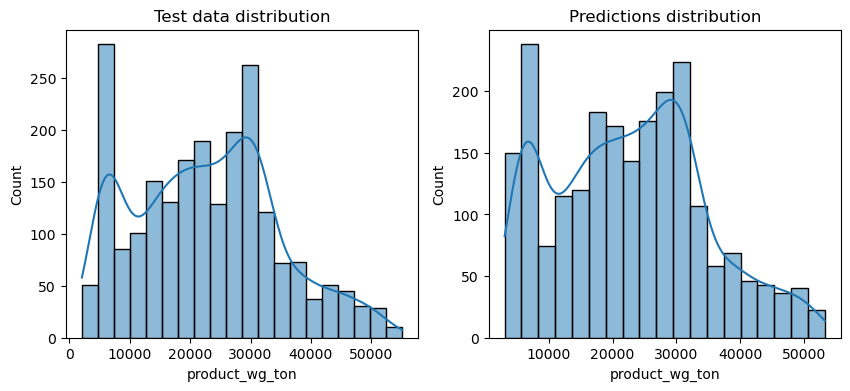

In [95]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(y_test, kde=True)
plt.title("Test data distribution")
plt.subplot(1, 2, 2)
sns.histplot(final_preds, kde=True)
plt.title("Predictions distribution")
plt.xlabel("product_wg_ton")
plt.show()


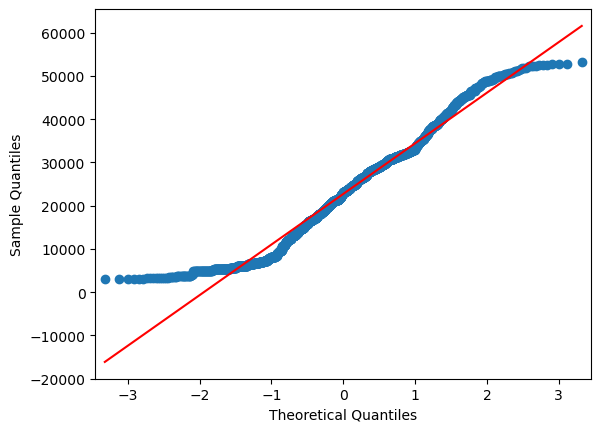

In [109]:
sm.qqplot(final_preds, line="r")
plt.show()
